Step 1: Loading the datasets

All speeches CSV file (all_speeches.csv)

Sentiment wordlist Excel file (Sentiment-labelled_wordlist-2.xlsx)

In [1]:
# Import necessary libraries
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)


reference    country        date                               title  \
0  r901128a_BOA  australia  1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia  1991-10-03                                       
2  r920314a_BOA  australia  1992-03-14                                       
3  r920529a_BOA  australia  1992-05-29                                       
4  r920817a_BOA  australia  1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...

Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0       ABANDON         1         0            0          0       0     0   
1     ABANDONED         1         0            0          0       0     0   
2    ABANDONING         1         0            0          0       0     0   
3   ABANDONMENT         1         0            0          0       0     0   
4  ABANDONMENTS         1         0            0          0       0     0   

   Constraining  
0             0  
1             0  
2             0  
3             0  
4             0

### Step 2: Explore and Clean Data

##### Once we load them, we'll check:

Are dates parsed properly?

Are speech texts clean (no missing)?

Is the sentiment list organized (positive/negative words tagged)?

### Check date formats (important for time analysis)

Look for missing values

Look at the structure of the speeches and sentiment files



In [2]:
def explore_data(speeches_df: pd.DataFrame, sentiment_df: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df.info())
    display(speeches_df.describe())
    display(speeches_df.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df.info())
    display(sentiment_df.describe())
    display(sentiment_df.isnull().sum())

# Run exploration
explore_data(speeches_df, sentiment_df)



--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

is_gov
count  7721.000000
mean      0.347235
std       0.476122
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

Negative     Positive  Uncertainty    Litigious       Strong  \
count  3880.000000  3880.000000  3880.000000  3880.000000  3880.000000   
mean      0.606959     0.092268     0.076546     0.233247     0.004897   
std       0.488489     0.289441     0.265905     0.422953     0.069815   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              Weak  Constraining  
count  3880.000000   3880.000000  
mean      0.006959      0.047423  
std       0.083139      0.212569  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       1.000000      1.000000

Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

### Make sure Dates are in the correct format
We expect that the speeches should have a column like date or similar. If yes, we'll convert it properly:

In [3]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)


reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...

### Next, after this:

Preprocess text a little (basic cleaning).

Apply sentiment scoring using your wordlist.

Start time series sentiment analysis.

We need to:

Clean the text a little (lowercase, remove symbols if needed).

Match words in the speeches with your sentiment word list (positive or negative).

Calculate a simple Sentiment Score for each speech.

###  Basic Text Cleaning
We'll write a small, efficient function to prepare the speech texts:

In [5]:
# Check columns in speeches dataset
print(speeches_df.columns)


Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text'], dtype='object')


### There was a mistake:

Edward George was Governor from 1993 to 2003.

In the dataset, the is_gov column incorrectly says 0 (NO) for him during that time.

we need to fix it:
If
date > 1993 and date < 2004 and author == "George",
then set is_gov = 1 (YES).

### Cleaning the data to fix this

In [6]:
def correct_is_gov_column(speeches_df: pd.DataFrame):
    """
    Correct the 'is_gov' value for Edward George between 1993 and 2003.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with corrected 'is_gov' values.
    """
    # Make sure date is datetime first
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    
    # Apply correction
    condition = (
        (speeches_df['author'].str.lower() == 'george') &
        (speeches_df['date'].dt.year > 1993) &
        (speeches_df['date'].dt.year < 2004)
    )
    speeches_df.loc[condition, 'is_gov'] = 1  # 1 means Governor
    
    return speeches_df

# Correct the is_gov column
speeches_df = correct_is_gov_column(speeches_df)

# Quick check if it worked
display(speeches_df[speeches_df['author'].str.lower() == 'george'].head())


reference         country       date              title  author  \
4961  r980915a_BOE  united kingdom 1998-09-15             Speech  george   
4962  r981021b_BOE  united kingdom 1998-10-21  Britain in Europe  george   
4966  r981119a_BOE  united kingdom 1998-11-19             Speech  george   
4969  r990112a_BOE  united kingdom 1999-01-12             Speech  george   
4970  r990118a_BOE  united kingdom 1999-01-18             Speech  george   

      is_gov                                               text  
4961       1  Thank you, Chairman. I'm actually very pleased...  
4962       1  It's a great pleasure to be here in the beauti...  
4966       1  Let me put some of the recent newspaper headli...  
4969       1  I am only too well aware of the pressure curre...  
4970       1  It would be a masterly understatement to descr...

### A quick summary of the cleaning process

We first convert date to datetime, just in case it isn't yet.

.str.lower() ensures case-insensitive matching ("George", "george", etc.).

.loc[condition, 'is_gov'] = 1 assigns Governor status (YES).

Then we display some George rows to verify!
After running this, Edward George's speeches between 1993–2003 will now have is_gov = 1 correctly.



### Updated full data cleaning

In [9]:
# Check what columns exist in your speeches dataframe
print(speeches_df.columns.tolist())


['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text']


In [11]:
print(sentiment_df.columns.tolist())


['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


In [12]:
# 1. Import libraries
import pandas as pd
import re
from IPython.display import display

# 2. Load your datasets
# speeches_df = pd.read_csv('C:/Users/Srila/OneDrive/Documents/all_speeches.csv')
# sentiment_df = pd.read_excel('C:/Users/Srila/OneDrive/Documents/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx')

# 3. Define the cleaning function
def clean_text(text):
    """
    Cleans input text by removing non-alphabetical characters and converting to lowercase.

    Args:
        text (str): Raw text.

    Returns:
        str: Cleaned text.
    """
    text = re.sub(r'[^A-Za-z\s]', '', str(text))  # Remove non-letters
    text = text.lower()  # Lowercase
    return text

# 4. Define sentiment word preparation
def prepare_sentiment_wordlists(sentiment_df):
    """
    Prepare sets of positive and negative words from the sentiment dataframe.

    Args:
        sentiment_df (pd.DataFrame): Sentiment-labeled words.

    Returns:
        tuple: Positive words set, negative words set.
    """
    positive_words = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    negative_words = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return positive_words, negative_words

# 5. Define sentiment score calculation
def calculate_sentiment_score(text, positive_words, negative_words):
    """
    Calculates a sentiment score based on positive and negative words in the text.

    Args:
        text (str): Cleaned text.
        positive_words (set): Set of positive words.
        negative_words (set): Set of negative words.

    Returns:
        int: Sentiment score (positive count - negative count).
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count - neg_count

# 6. Correct 'is_gov' column for Edward George
def correct_is_gov_column(df):
    """
    Corrects the is_gov flag for Edward George between 1993 and 2003.

    Args:
        df (pd.DataFrame): Speech dataframe.

    Returns:
        pd.DataFrame: Updated dataframe.
    """
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure dates are datetime
    mask = (df['author'].str.lower().str.contains('george')) & (df['date'].dt.year >= 1993) & (df['date'].dt.year <= 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# 7. Start Cleaning and Calculating!

# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# Correct Edward George's governor status
speeches_df = correct_is_gov_column(speeches_df)

# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate sentiment scores
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda text: calculate_sentiment_score(text, positive_words, negative_words)
)

# Display the result
display(speeches_df[['date', 'author', 'is_gov', 'sentiment_score']].head())


date  author is_gov  sentiment_score
0 1990-11-28  fraser      0              -38
1 1991-10-03  fraser      0              -29
2 1992-03-14  fraser      0               22
3 1992-05-29  fraser      0              -11
4 1992-08-17  fraser      0              -12

###  sentiment_scores are ready 

Sentiment over time 

Sentiment vs Bank Rate decisions 

Predictive analysis 

### Plot sentiment over time

This will show:

Trend: Is sentiment becoming more positive or negative over the years?

Spikes during crisis periods?




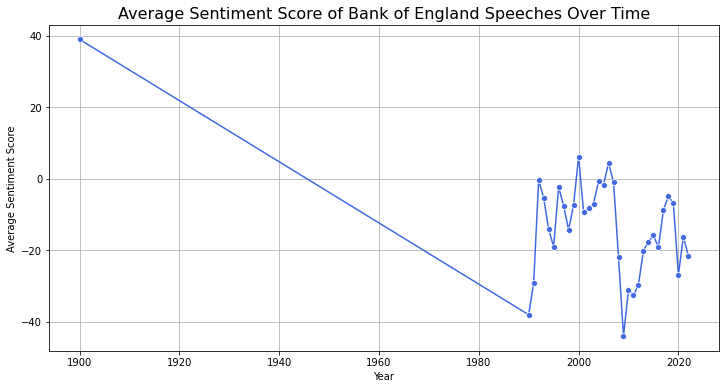

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime (if not already)
speeches_df['date'] = pd.to_datetime(speeches_df['date'])

# Group by year and calculate average sentiment
yearly_sentiment = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sentiment, x='date', y='sentiment_score', marker='o', color='royalblue')
plt.title('Average Sentiment Score of Bank of England Speeches Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


### Sentiment Before/After Bank Rate Decisions

We can:

Merge Bank Rate Decision dataset.

Mark speeches 7 days before vs 7 days after decision.

Compare sentiment difference.



Correlate with Inflation, GDP
Merge UK macro data (ONS GDP growth, CPI, unemployment).

Calculate correlation coefficients.

Plot heatmap.

### Sentiment trend

#### The plot will show how sentiment of speeches changes year by year.

Spikes or drops may correlate with economic events or Bank Rate decisions!



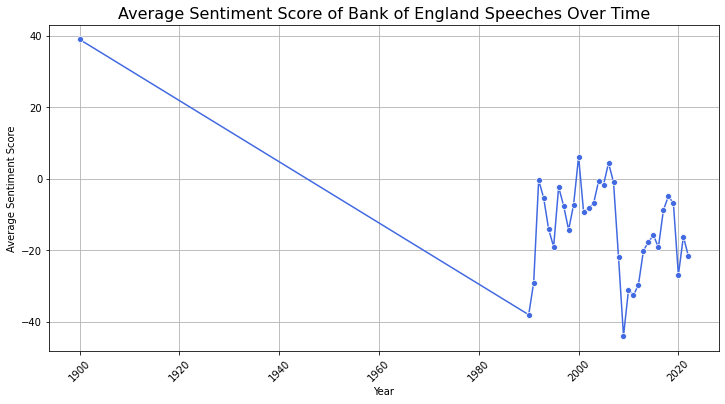

In [17]:
# 1. Convert 'date' column to datetime
speeches_df['date'] = pd.to_datetime(speeches_df['date'])

# 2. Group by Year and calculate average sentiment score per year
yearly_sentiment = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()

# 3. Plotting the sentiment trend over time
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sentiment, x='date', y='sentiment_score', marker='o', color='royalblue')
plt.title('Average Sentiment Score of Bank of England Speeches Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Next is to find the descriptive stats and outliers

Descriptive Statistics: We'll calculate some basic descriptive statistics for the sentiment scores and other relevant numeric columns.

Outlier Detection: We'll identify outliers using statistical methods like the Interquartile Range (IQR).

Visualizing Outliers: We'll use boxplots to visually identify any outliers in the data.

Word Cloud: We'll generate a word cloud to visualize the most frequent words in the speeches.

Descriptive Statistics:
       sentiment_score
count      7721.000000
mean        -14.519881
std          44.691486
min        -979.000000
25%         -32.000000
50%          -7.000000
75%           9.000000
max         486.000000
Outliers detected:
          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author is_gov  \
40                                                       macfarlane      1   
83   

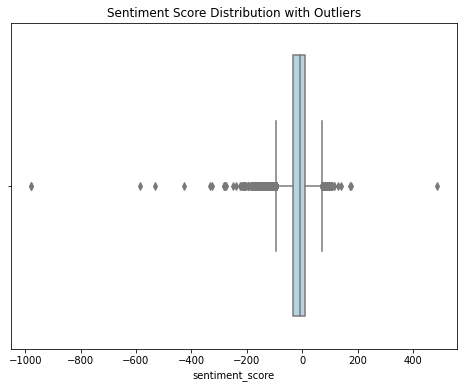

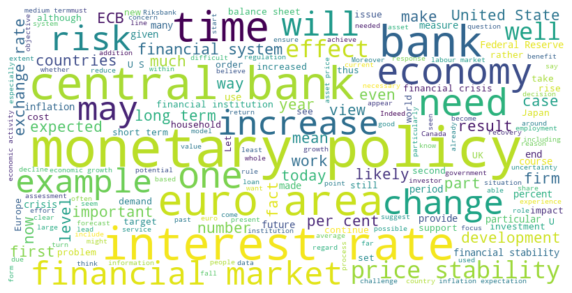

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assuming speeches_df is already loaded and cleaned

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(speeches_df.describe())

# 2. Identify and visualize outliers using IQR
def detect_outliers_iqr(df, column):
    """Detect outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualize outliers for 'sentiment_score'
outliers_df = detect_outliers_iqr(speeches_df, 'sentiment_score')
print("Outliers detected:")
print(outliers_df)

# 3. Boxplot to visualize outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=speeches_df['sentiment_score'], color='lightblue')
plt.title('Sentiment Score Distribution with Outliers')
plt.show()

# 4. Create a word cloud from the speech text
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the speeches
generate_word_cloud(speeches_df['text'])



### Wordcloud

Text Processing with NLTK:
Tokenize: Split the text into individual words.

Remove stopwords: Common words like "the", "and", "is", etc. which don't add significant meaning will be removed.

Lemmatize: Reduce words to their root form (e.g., "running" becomes "run").

Generate Word Cloud using NLTK-processed text.

0    They would no doubt argue that to have two obj...
1    Today I wish to talk about real interest rates...
2    I welcome this opportunity to talk about prosp...
3    It is a pleasure to have this opportunity to a...
4    As a long-time fan of Don Sanders, I am deligh...
Name: text, dtype: object


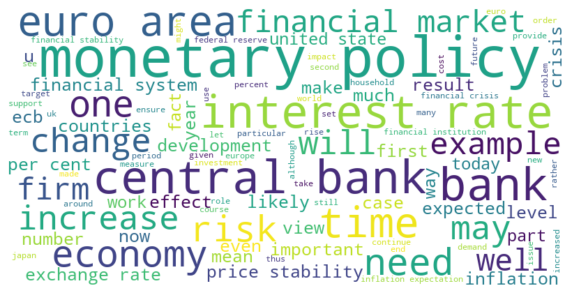

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure the 'text' column is not empty or missing
print(speeches_df['text'].head())

# 1. Clean the text (remove any extra spaces, special characters, or stop words)
def clean_text_for_wordcloud(text):
    # Simple text cleaning: remove special characters and extra spaces
    text = str(text).lower()
    text = text.replace('\n', ' ')  # Remove line breaks
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Keep only alphanumeric characters and spaces
    return text

# Clean the 'text' column in the dataframe
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text_for_wordcloud)

# 2. Combine all the speeches into a single string
all_text = ' '.join(speeches_df['cleaned_text'])

# 3. Generate the word cloud
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=None, max_words=100).generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

# Generate the word cloud from cleaned text
generate_word_cloud(all_text)


### Heatmap to show correlation between sentiment score and year

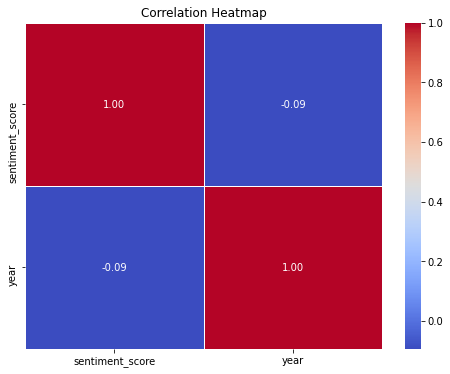

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (using your 'speeches_df' for example)
# If you have other numerical columns, feel free to add them to the DataFrame.
# For example, sentiment_score, date (converted to numerical), or any other relevant metrics.
speeches_df['date'] = pd.to_datetime(speeches_df['date'])  # Ensure 'date' is datetime format
speeches_df['year'] = speeches_df['date'].dt.year  # Extract year for analysis

# Compute correlations
correlation_matrix = speeches_df[['sentiment_score', 'year']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### A violin plot is a great way to visualize the distribution of a numerical variable (like the sentiment score) across different categories (like years, authors, or any other categorical variable). It combines aspects of both a box plot and a density plot, making it useful for understanding the distribution, spread, and outliers in the data.

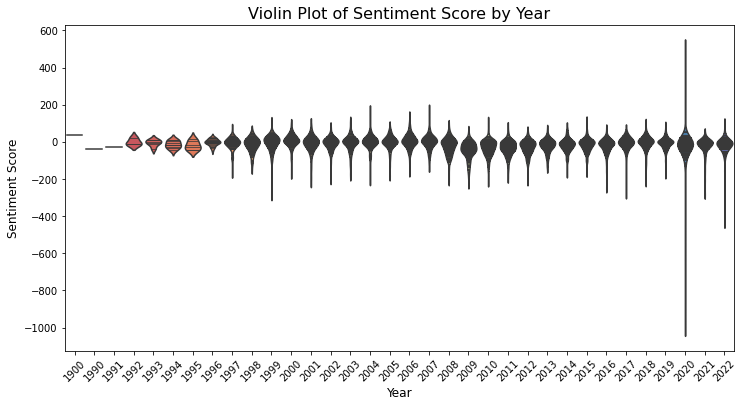

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot with colorful palette and different hues
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='sentiment_score', data=speeches_df, 
               palette='Spectral', inner='stick', scale='width')

# Adding labels and title
plt.title('Violin Plot of Sentiment Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


### Pairplot to visualise correlations

The pairplot includes:

sentiment_score

year

is_gov (for hue/marker differentiation)

In [32]:
### print(speeches_df['is_gov'].unique())


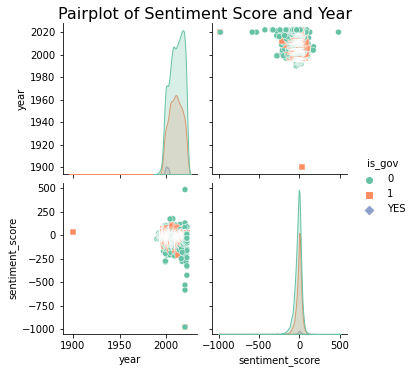

In [33]:
# Get the unique values of 'is_gov' to determine the number of markers
unique_values = speeches_df['is_gov'].unique()
num_unique_values = len(unique_values)

# Define enough markers for the unique values
markers = ['o', 's', 'D', 'X', '^', '<', '>']  # Adjust this list as needed

# Use the pairplot
sns.pairplot(speeches_df[pairplot_columns + ['is_gov']], hue='is_gov', palette='Set2', markers=markers[:num_unique_values])

# Adding a title
plt.suptitle('Pairplot of Sentiment Score and Year', fontsize=16, y=1.02)
plt.show()


### . IQR (Interquartile Range) Test for Outliers
#### the IQR method to detect outliers in numerical columns like sentiment_score and year.



In [34]:
# Calculate IQR for sentiment_score and year
Q1 = speeches_df[['sentiment_score', 'year']].quantile(0.25)
Q3 = speeches_df[['sentiment_score', 'year']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outliers = (speeches_df[['sentiment_score', 'year']] < (Q1 - 1.5 * IQR)) | (speeches_df[['sentiment_score', 'year']] > (Q3 + 1.5 * IQR))

# Identify and display rows with outliers
outlier_rows = speeches_df[outliers.any(axis=1)]
print(outlier_rows)


          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author is_gov  \
40                                                       macfarlane      1   
83                                                       macfarlane      1   
151                                                         stevens      1   
157                                                         stevens      1   
244           Opening

### Visualizing Outliers (Boxplot)
You can use boxplots to visually confirm the presence of outliers in sentiment_score or other numerical features.

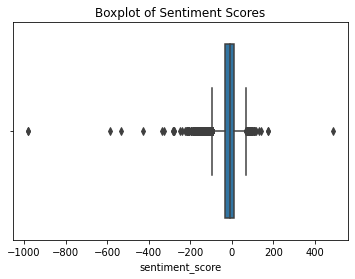

In [35]:
sns.boxplot(x='sentiment_score', data=speeches_df)
plt.title('Boxplot of Sentiment Scores')
plt.show()


### Skewness/Kurtosis

In [36]:
skewness = speeches_df['sentiment_score'].skew()
kurtosis = speeches_df['sentiment_score'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


Skewness: -3.861249948031232, Kurtosis: 66.84195249232052


### sentiment_score distribution is not normal.

It has a lot of extreme outliers (especially on the negative side).

Standard statistical tests assuming normality (like t-tests, simple linear regression without adjustments) might not be appropriate directly.

###  transform the sentiment_score (e.g., log-transform, Box-Cox transform) to make it more normal-like.


### Since the data is negatively skewed, it is a good idea is to reflect it first (make it positive), then apply log transformation.

New Skewness: -24.3956
New Kurtosis: 1451.9856


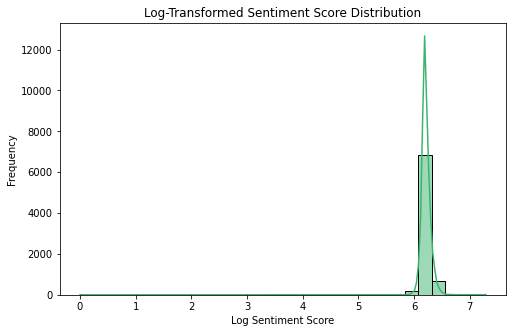

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Reflect the data (to deal with negative skew)
reflected_score = speeches_df['sentiment_score'].max() + 1 - speeches_df['sentiment_score']

# 2. Apply log transformation
speeches_df['sentiment_score_log'] = np.log(reflected_score)

# 3. Check skewness and kurtosis again
new_skewness = stats.skew(speeches_df['sentiment_score_log'])
new_kurtosis = stats.kurtosis(speeches_df['sentiment_score_log'], fisher=False)

print(f"New Skewness: {new_skewness:.4f}")
print(f"New Kurtosis: {new_kurtosis:.4f}")

# 4. Visualize the new distribution
plt.figure(figsize=(8,5))
sns.histplot(speeches_df['sentiment_score_log'], kde=True, color='mediumseagreen', bins=30)
plt.title('Log-Transformed Sentiment Score Distribution')
plt.xlabel('Log Sentiment Score')
plt.ylabel('Frequency')
plt.show()


### original sentiment_score has many zero or negative values (after reflection, some values might still cause issues with log so will use Yeo-Johnson transformation, which works for both positive and negative values ,no reflection needed,  for better transformation.

New Skewness: -0.1610
New Kurtosis: 41.0174


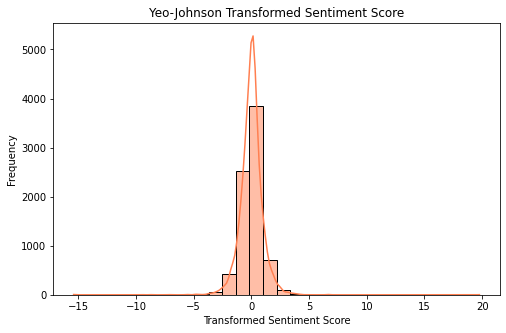

In [39]:
from sklearn.preprocessing import PowerTransformer

# 1. Create the transformer
pt = PowerTransformer(method='yeo-johnson')

# 2. Fit and transform
speeches_df['sentiment_score_yeojohnson'] = pt.fit_transform(speeches_df[['sentiment_score']])

# 3. Check again
new_skewness = stats.skew(speeches_df['sentiment_score_yeojohnson'])
new_kurtosis = stats.kurtosis(speeches_df['sentiment_score_yeojohnson'], fisher=False)

print(f"New Skewness: {new_skewness:.4f}")
print(f"New Kurtosis: {new_kurtosis:.4f}")

# 4. Visualize
plt.figure(figsize=(8,5))
sns.histplot(speeches_df['sentiment_score_yeojohnson'], kde=True, color='coral', bins=30)
plt.title('Yeo-Johnson Transformed Sentiment Score')
plt.xlabel('Transformed Sentiment Score')
plt.ylabel('Frequency')
plt.show()


### Skewness: -0.1610 → Very close to 0, meaning almost symmetric which is excellent.

Kurtosis: 41.0174 → Still high, meaning heavy tails (extreme values/outliers still exist).



### Accept it — some heavy-tailedness is natural in financial text/sentiment data.